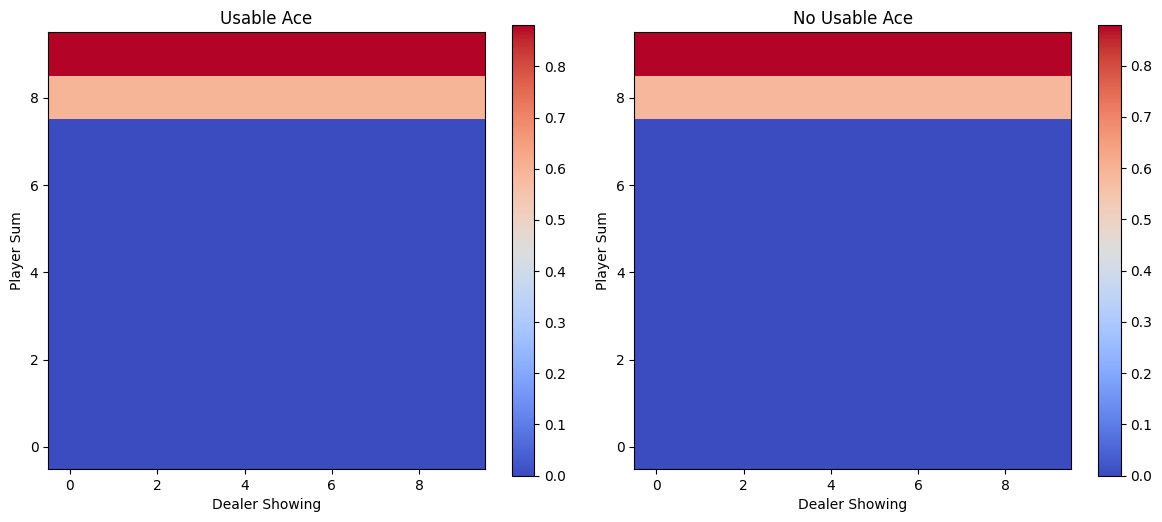

In [1]:
import random
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

# Draw one card (1 to 13, face cards count as 10)
def draw_card():
    return min(random.randint(1, 13), 10)

# Draw a starting hand
def draw_hand():
    return [draw_card(), draw_card()]

# Whether the hand has a usable ace
def usable_ace(hand):
    return 1 in hand and sum(hand) + 10 <= 21

# Total value of a hand
def hand_value(hand):
    val = sum(hand)
    return val + 10 if usable_ace(hand) else val

# Whether the hand is bust
def is_bust(hand):
    return hand_value(hand) > 21

# Simple policy: stick if 20+, hit otherwise
def policy(player_sum):
    return 0 if player_sum >= 20 else 1  # 0 = stick, 1 = hit

# Simulate one episode of blackjack
def play_game(policy_fn):
    player = draw_hand()
    dealer = draw_hand()

    while policy_fn(hand_value(player)) == 1:
        player.append(draw_card())
        if is_bust(player):
            return (player, dealer), -1  # Player busts

    while hand_value(dealer) < 17:
        dealer.append(draw_card())

    player_score = hand_value(player)
    dealer_score = hand_value(dealer)

    if is_bust(dealer) or player_score > dealer_score:
        return (player, dealer), 1
    elif player_score < dealer_score:
        return (player, dealer), -1
    else:
        return (player, dealer), 0

# Monte Carlo prediction
returns = defaultdict(list)
V = defaultdict(float)

for i in range(500000):
    (player, _), reward = play_game(policy)
    state = (hand_value(player), usable_ace(player))
    returns[state].append(reward)
    V[state] = sum(returns[state]) / len(returns[state])

# Visualize the state-value function
usable = np.zeros((10, 10))
no_usable = np.zeros((10, 10))

for player in range(12, 22):
    for dealer in range(1, 11):
        s_usable = (player, True)
        s_nousable = (player, False)
        if s_usable in V:
            usable[player - 12, dealer - 1] = V[s_usable]
        if s_nousable in V:
            no_usable[player - 12, dealer - 1] = V[s_nousable]

fig, axs = plt.subplots(1, 2, figsize=(12, 5))
c1 = axs[0].imshow(usable, cmap='coolwarm', origin='lower')
axs[0].set_title('Usable Ace')
axs[0].set_xlabel('Dealer Showing')
axs[0].set_ylabel('Player Sum')
fig.colorbar(c1, ax=axs[0])

c2 = axs[1].imshow(no_usable, cmap='coolwarm', origin='lower')
axs[1].set_title('No Usable Ace')
axs[1].set_xlabel('Dealer Showing')
axs[1].set_ylabel('Player Sum')
fig.colorbar(c2, ax=axs[1])

plt.tight_layout()
plt.show()

In [6]:
import numpy as np
np.random.seed(42)

class MyBlackjack:
    def __init__(self):
        print("blackjack")
    def drawcard(self):
        card = np.random.randint(1, high=13, size=None, dtype='l')  
        return card

In [7]:
b = MyBlackjack()
print(b.drawcard())
print(b.drawcard())
print(b.drawcard())


blackjack
7
4
11
